<a href="https://colab.research.google.com/github/sruby8/uplift.ai/blob/master/Shoulder_Abduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

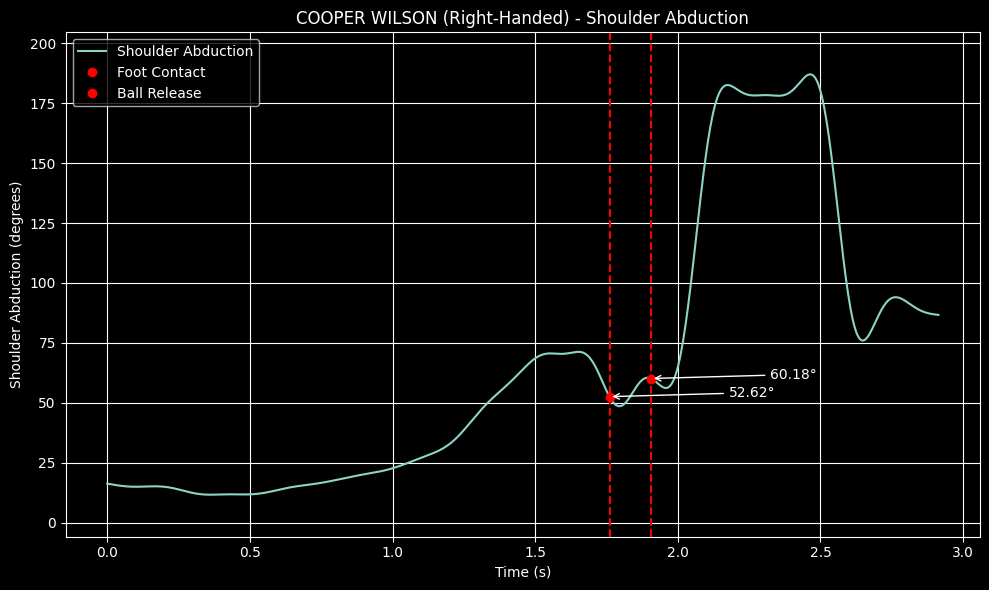

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use a dark background style
plt.style.use('dark_background')

# Load the dataset (update the file path if needed)
df = pd.read_csv('./uplift_data_export_20250319024322.csv')

# Extract the athlete's name and handedness
athlete_name = df['athlete_name'].iloc[0].upper()  # using all caps for the name
handedness = df['handedness'].iloc[0].lower()

# Select the appropriate shoulder adduction metric based on handedness
if handedness == 'right':
    shoulder_adduction = df['right_shoulder_adduction']
else:
    shoulder_adduction = df['left_shoulder_adduction']

# Invert the values so that abduction appear higher on the chart
shoulder_adduction_inverted = -shoulder_adduction

# Create a time vector assuming each row represents a frame and using the provided fps
fps = df['fps'].iloc[0]
time = np.arange(len(df)) / fps

# Identify the first instance where the foot makes contact (foot_contact_frame == 0)
foot_contact_indices = df.index[df['foot_contact_frame'] == 0].tolist()
if foot_contact_indices:
    landing_index = foot_contact_indices[0]
    landing_time = landing_index / fps
    landing_value = shoulder_adduction_inverted.iloc[landing_index]
else:
    landing_index = None
    landing_time = None
    landing_value = None

# Identify ball release (ball_release_frame == 0)
ball_release_indices = df.index[df['ball_release_frame'] == 0].tolist()
if ball_release_indices:
    release_index = ball_release_indices[0]
    release_time = release_index / fps
    release_value = shoulder_adduction_inverted.iloc[release_index]
else:
    release_index = None
    release_time = None
    release_value = None

# Plot the inverted shoulder horizontal adduction over time
plt.figure(figsize=(10, 6))
plt.plot(time, shoulder_adduction_inverted, label='Shoulder Abduction')

# Adjust the y-axis limits based on the inverted values.
min_val = shoulder_adduction_inverted.min()
max_val = shoulder_adduction_inverted.max()
y_margin = 0.1 * (max_val - min_val)
plt.ylim(min_val - y_margin, max_val + y_margin)

# Mark the foot contact event with a point and annotate the value.
if landing_time is not None:
    plt.plot(landing_time, landing_value, 'ro', label='Foot Contact')
    plt.axvline(x=landing_time, linestyle='--', color='r')
    plt.annotate(f'{landing_value:.2f}°',
                 xy=(landing_time, landing_value),
                 xytext=(landing_time +0.5, landing_value),
                 arrowprops=dict(facecolor='red', arrowstyle='->'),
                 horizontalalignment='center')

# Mark the ball release contact event with a point and annotate the value.
if release_time is not None:
    plt.plot(release_time, release_value, 'ro', label='Ball Release')
    plt.axvline(x=release_time, linestyle='--', color='r')
    plt.annotate(f'{release_value:.2f}°',
                 xy=(release_time, release_value),
                 xytext=(release_time +0.5, release_value),
                 arrowprops=dict(facecolor='red', arrowstyle='->'),
                 horizontalalignment='center')

plt.xlabel('Time (s)')
plt.ylabel('Shoulder Abduction (degrees)')
plt.title(f'{athlete_name} ({handedness.capitalize()}-Handed) - Shoulder Abduction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()